Gesture Recognition thru Machine Learning
========================
** Machine learning algorithms applied to glove sensor values to derive the categories. **

Includes the analysis of the following unsupervised algorithms:
1. PCA

Includes the analysis of the following supervised algorithms:
1. SVC
2. K Neighbors Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Ada Boost Classifier
6. Gaussian Naive Bayes
7. Linear Discrimninant Analysis
8. Quadratic Discriminant Analysis

In [2]:
%pylab inline
#Essentials
import pandas as pd
import numpy as np
import string
import os

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

#Libraries for the estimators
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Utilities
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

#Model persistence
from sklearn.externals import joblib

#Analysis
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:
def data_cleaning(file):
    feature_names = ['fThumb', 'fIndex', 'fMiddle', 'fRing', 'fPinky', 'c1', 'c2', 'c3', 'c4', 'aX', 'aY', 'aZ', 'gX', 'gY', 'gZ', 'label']
    a = pd.read_excel(file, convert_float=True, names=feature_names)
    a.dropna(how='any',inplace=True)
    a.to_csv(file.split(".")[0] + ".csv", index=False)

In [96]:
#Data Parameters
feature_names = ['label', 'fThumb', 'fIndex', 'fMiddle', 'fRing', 'fPinky', 'c1', 'c2', 'c3', 'c4', 'aX', 'aY', 'aZ', 'gX', 'gY', 'gZ']

#Saving and consolidating all data
data = pd.concat([pd.read_csv("data/%s.csv" % str(fn.strip().split(".")[0])) for fn in os.listdir('data') if fn.endswith('.xlsx')])
data.reset_index(drop=True).sort_values('label').sort_index()
data.to_csv("data/processed/raw_consolidated.csv", index=False)

#Random selection and saving of target and test data
sl = data.sample(frac=0.33).sort_index().reset_index(drop=True)
sl.to_csv("data/processed/sl.csv", index=False)


fPinky  fRing  fMiddle  fIndex  fThumb  c1  c2  c3  c4     aX     aY  \
0        233    102      122     134     135   0   1   1   1     30    120   
1        214     95      105     124     116   0   1   1   1     29    125   
2        241    102      118     127     122   0   1   1   1     32    129   
3        232     98      108     119     115   0   1   1   1     93     81   
4        245    101      108     122     114   0   1   1   1      4    130   
5        232    100      124     135     132   0   1   1   1     24    119   
6        238    103      118     129     120   0   1   1   1     23    129   
7        232     96      110     121     115   0   1   1   1     93     81   
8        212     96      104     122     114   0   1   1   1     32    131   
9        212     94      105     121     116   0   1   1   1     31    128   
10       222     96      102     120     121   0   1   1   1     34    124   
11       212     96      106     123     116   0   1   1   1     31    127   
12       222     98      105     120     118   0   1   1   1     32    126   
13       214     95      104     122     117   0   1   1   1     32    126   
14       213     95      106     122     115   0   1   1   1     31    129   
15       213     94      106     121     115   0   1   1   1     31    128   
16       243    104      103     127     114   0   1   1   1      7    129   
17       242    102      117     126     120   0   1   1   1     33    124   
18       222     96      114     120     116   0   1   1   1     92     80   
19       239    103      118     127     119   0   1   1   1     19    127   
20       221     98      104     120     121   0   1   1   1     32    128   
21       232    102      123     136     135   0   1   1   1     30    119   
22       225     96      110     121     119   0   1   1   1     92     82   
23       212     96      105     122     116   0   1   1   1     31    128   
24       224     99      109     118     117   0   1   1   1     92     81   
25       223     97      108     119     118   0   1   1   1     31    128   
26       239    104      121     125     122   0   1   1   1     29    125   
27       238    102      118     126     120   0   1   1   1     18    129   
28       244    102      107     121     114   0   1   1   1      7    129   
29       212     94      105     122     116   0   1   1   1     32    129   
...      ...    ...      ...     ...     ...  ..  ..  ..  ..    ...    ...   
9028     245    182      244     251     229   1   1   1   1  65527     69   
9029     248    171      244     245     229   1   1   1   1  65515    150   
9030     253    177      243     231     236   1   1   1   1    119     87   
9031     256    183      242     244     234   1   1   1   1     17     74   
9032     255    182      242     244     234   1   1   1   1     63    124   
9033     249    174      225     239     223   1   1   1   1     85  65485   
9034     247    169      213     238     224   1   1   1   1     56  65529   
9035     245    168      212     237     224   1   1   1   1     37  65529   
9036     244    168      212     237     222   1   1   1   1     55  65530   
9037     243    160      212     239     234   1   1   1   1     99  65487   
9038     242    160      212     237     235   1   1   1   1     76  65489   
9039     244    162      215     235     233   1   1   1   1     90  65488   
9040     244    161      215     239     234   1   1   1   1     87  65490   
9041     244    161      211     238     235   1   1   1   1     89  65491   
9042     244    162      213     236     233   1   1   1   1     87  65490   
9043     244    162      213     238     235   1   1   1   1     87  65490   
9044     245    163      214     237     234   1   1   1   1     86  65489   
9045     245    161      213     237     233   1   1   1   1     87  65490   
9046     244    163      214     237     233   1   1   1   1     88  65489   
9047     245    164      213

In [5]:
# Loading of sampled data
sl = pd.read_csv("data/processed/sl.csv")

#Data Parameters
target_names = [i for i in string.ascii_uppercase]
target_names.extend(['_', '/', '-']) #Space, enter, rest/stop

sl_data = sl.iloc[:,:-1]
sl_target = sl['label'].apply(lambda x: target_names.index(x)).values

# Data contains the observations, target contains the classifications
sl_data.drop(labels=['gX', 'gY', 'gZ'], axis=1, inplace=True)
X, y = sl_data, sl_target


#Standardize X because of different scaling from different sensors
scaler = StandardScaler()
X_std = scaler.fit_transform(X) 
print("***** Data loaded and standardized *****")

***** Data loaded and standardized *****


In [87]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# X_KBest = SelectKBest(chi2, k=10).fit_transform(X, y)


array([ 0.9122223 , -1.26265436, -0.82179521, -0.71690576, -0.61791024,
       -0.85089353,  0.31422679,  0.2046166 ,  0.19321994, -0.30654724,
       -0.24169488, -0.59200136])

In [75]:
# Saving of scaler
# joblib.dump(scaler, "prediction/scaler/all/scaler.pkl")
# joblib.dump(scaler, "prediction/scaler/wo_g/scaler.pkl")


['prediction/scaler/wo_g/scaler.pkl',
 'prediction/scaler/wo_g/scaler.pkl_01.npy',
 'prediction/scaler/wo_g/scaler.pkl_02.npy',
 'prediction/scaler/wo_g/scaler.pkl_03.npy']

In [76]:
def plot_scatter(X_estimator, letter, title, directory):
    plt.figure()
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12, 8)
    for i in range(len(target_names)):
        px = X_estimator[y == i, 0]
        py = X_estimator[y == i, 1]
        if i is letter :
            plt.scatter(px, py, c='red', zorder=2)
        else:
            plt.scatter(px, py, c='silver', alpha=0.5, zorder=1)
        plt.legend(target_names)
    plt.title("PCA 2 Components plot for letter %s" % target_names[letter])
    plt.xlabel("First Component")
    plt.ylabel("Second Component")
    plt.savefig("plots/%s/%s.png" % (directory, letter))
 

### Principal Component Analysis (PCA) 
Identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

/home/jerelynco/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/jerelynco/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


***** Plotting PCA *****
Explained variance ratio (first 12 components): [ 0.18466446  0.15508265  0.10774584  0.09502517  0.08978708  0.08749113
  0.07838255  0.06406772  0.05498712  0.03878384  0.0266047   0.01737775]


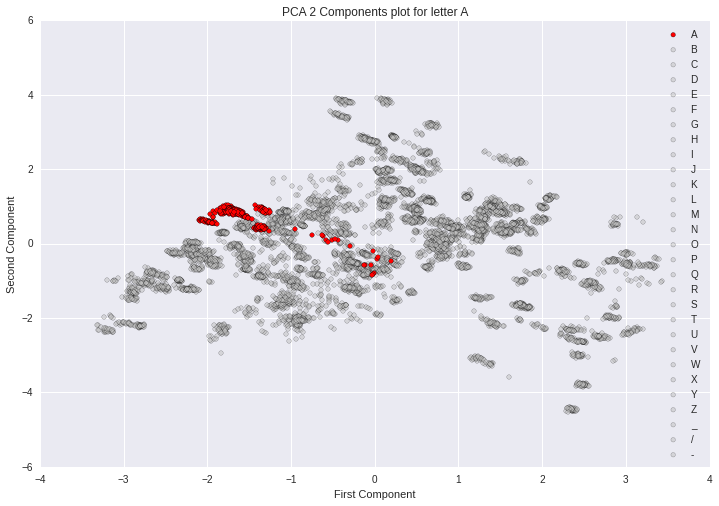

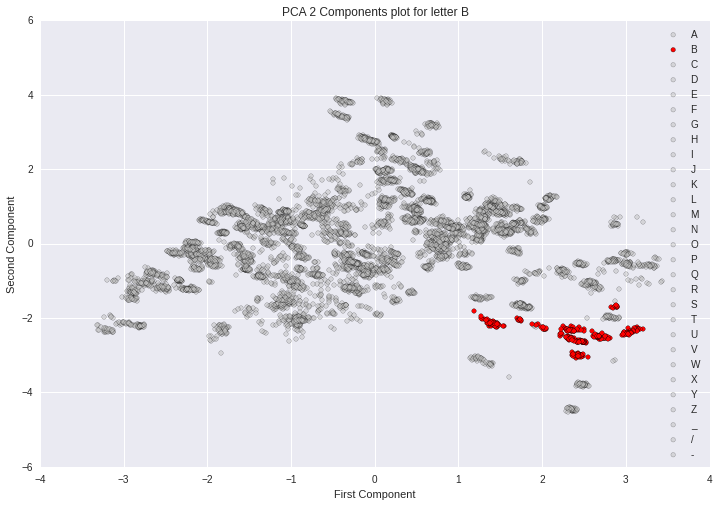

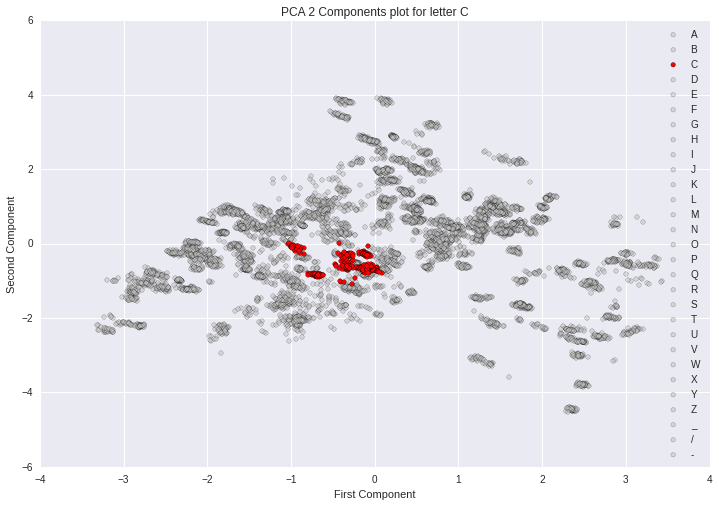

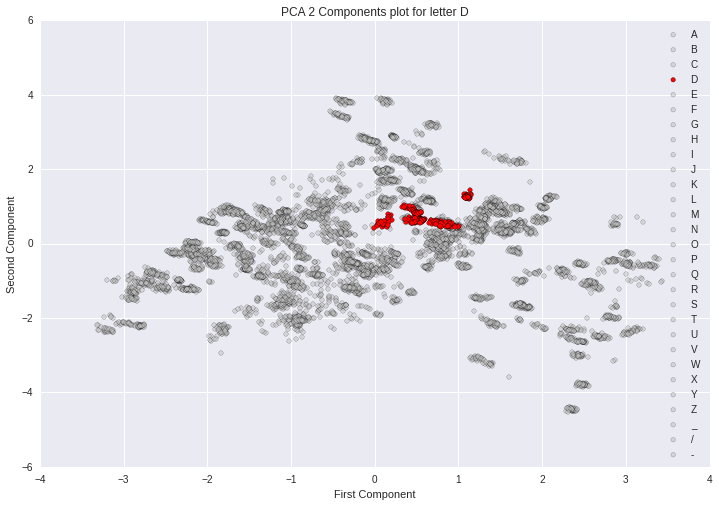

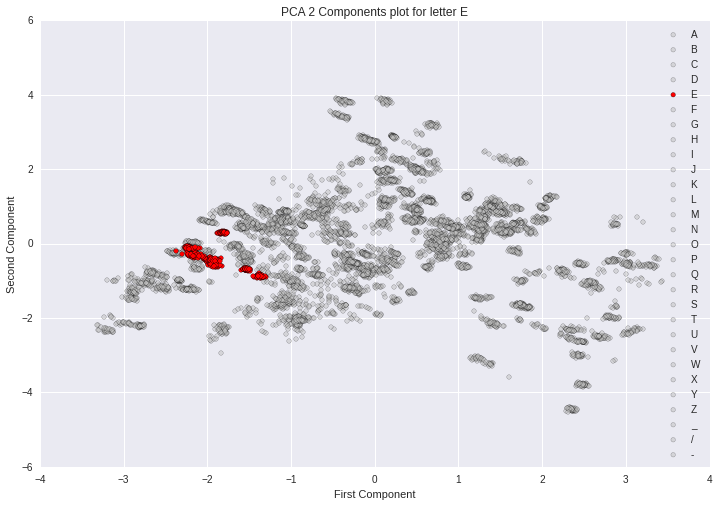

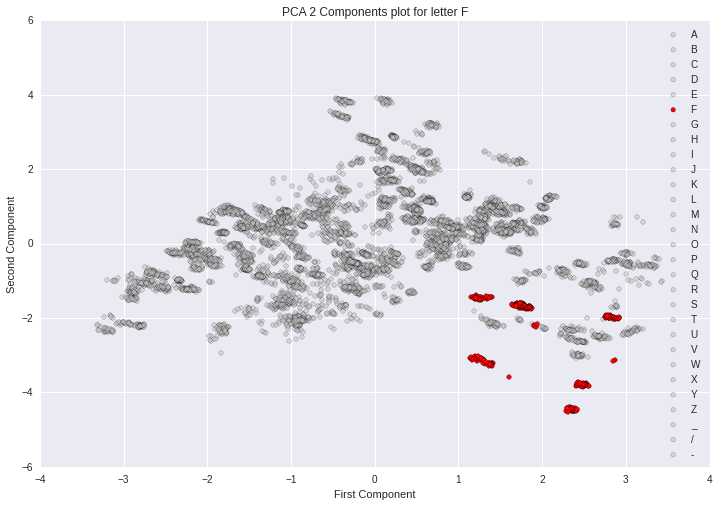

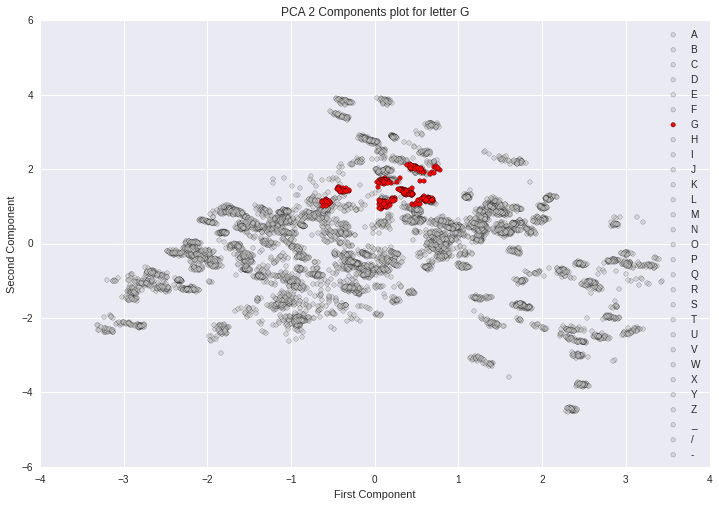

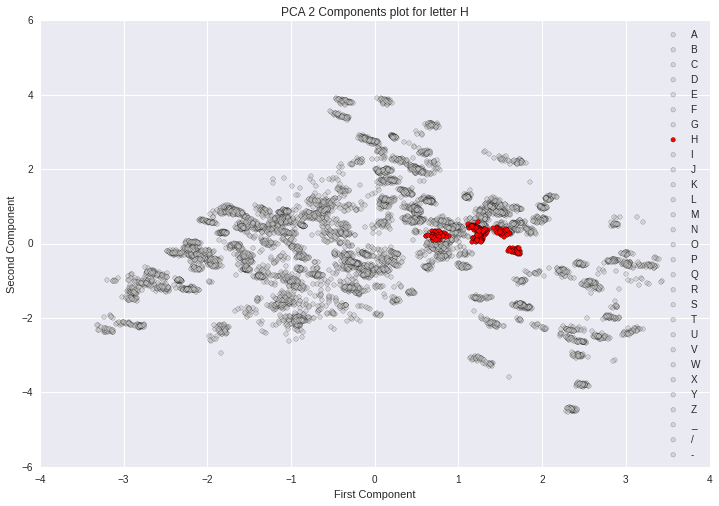

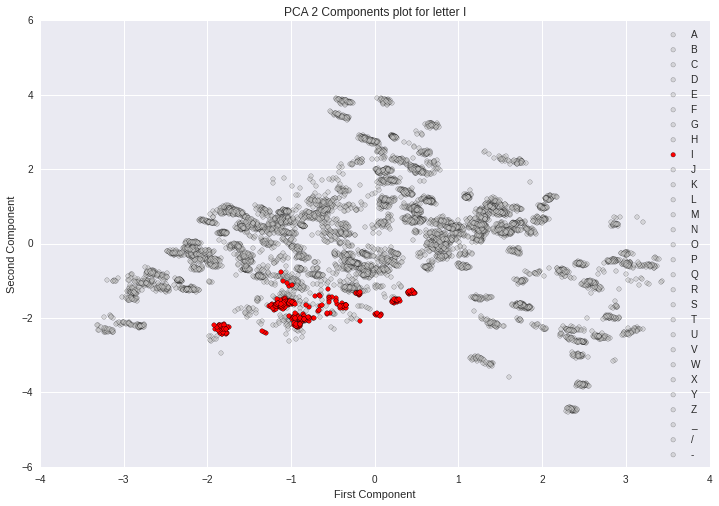

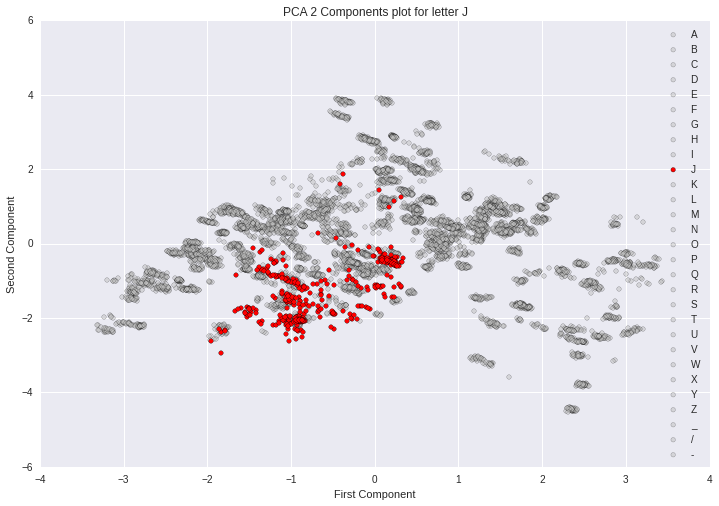

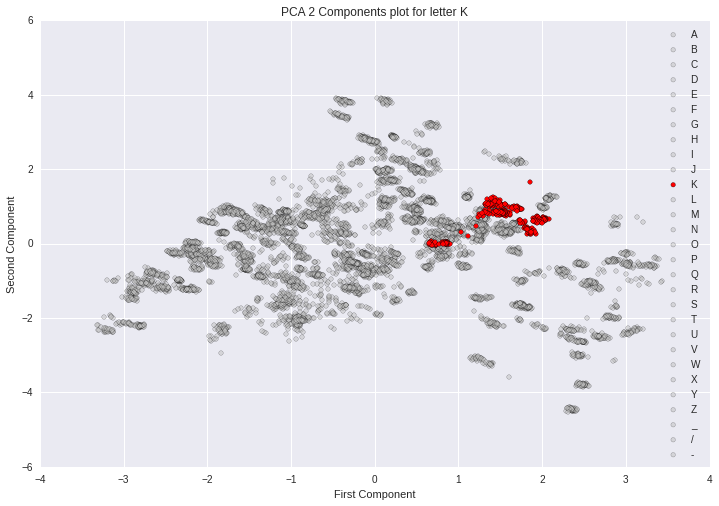

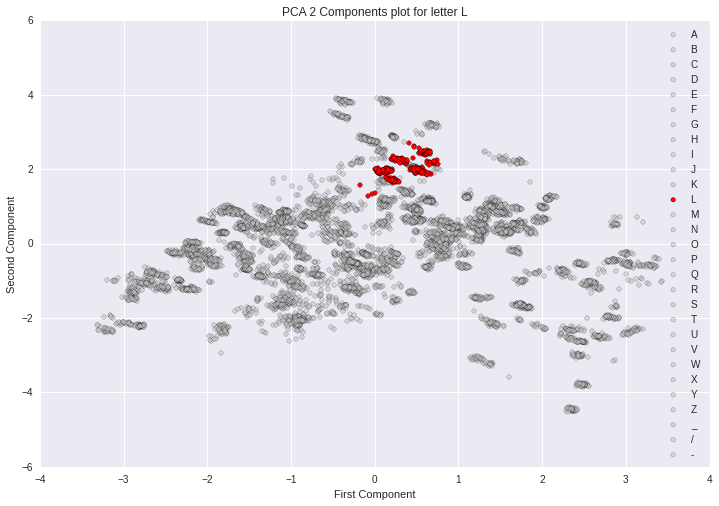

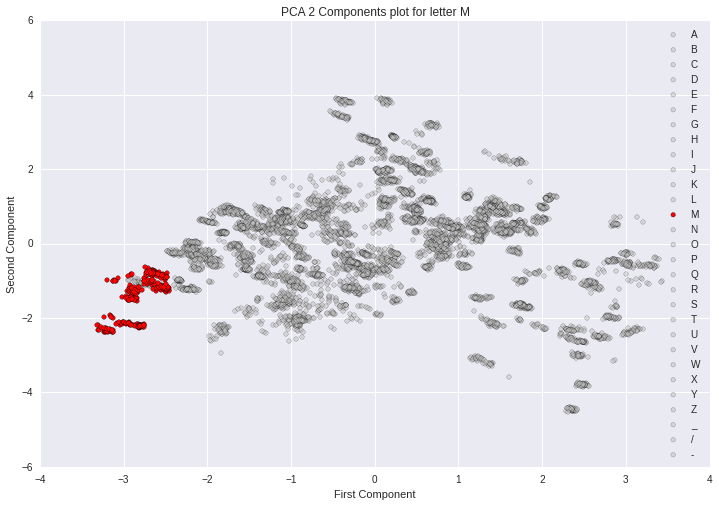

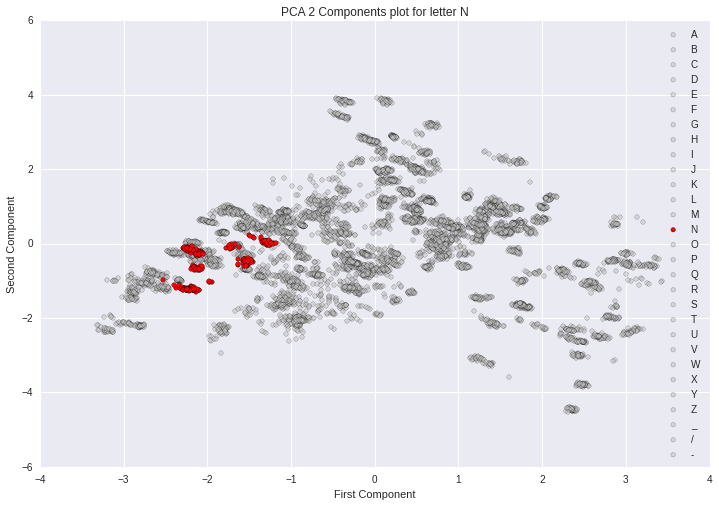

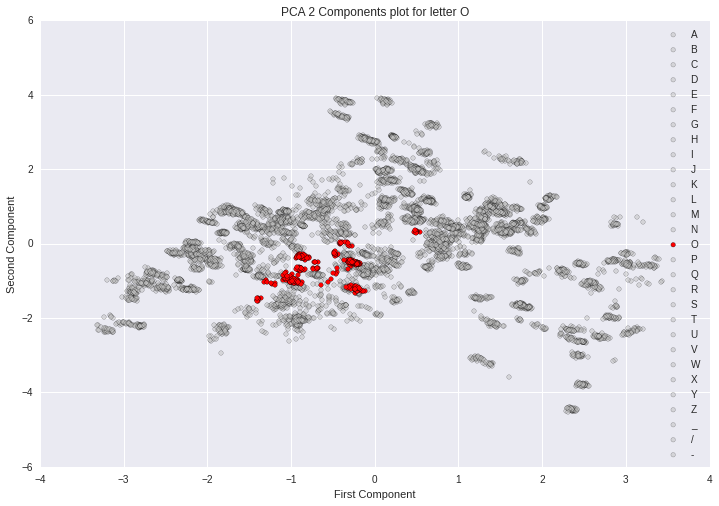

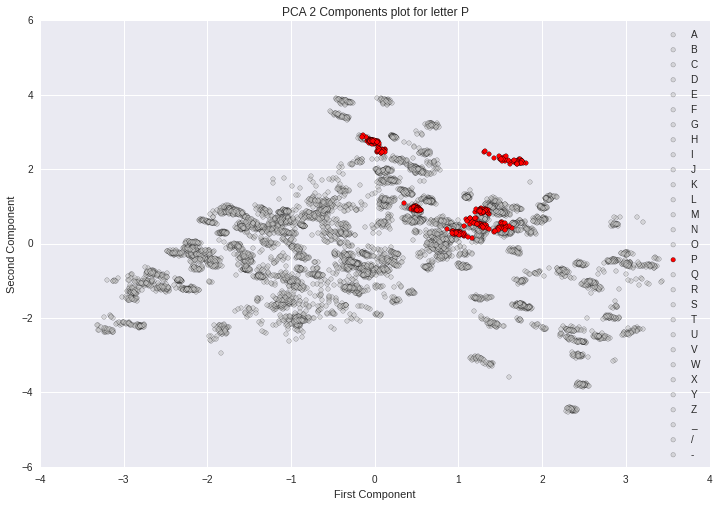

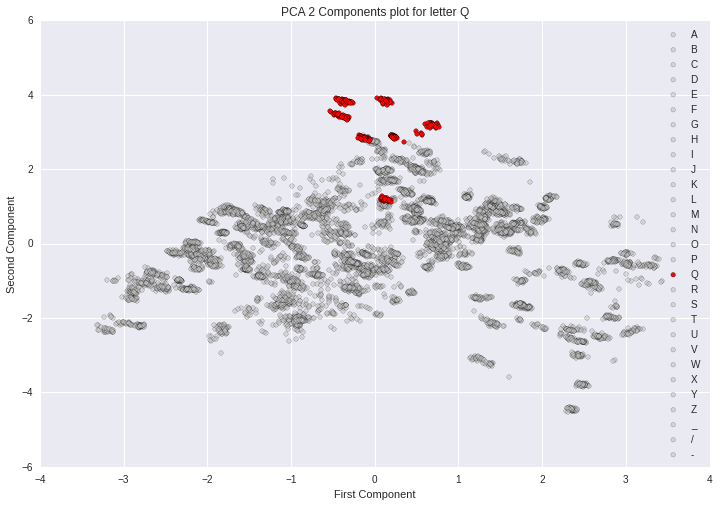

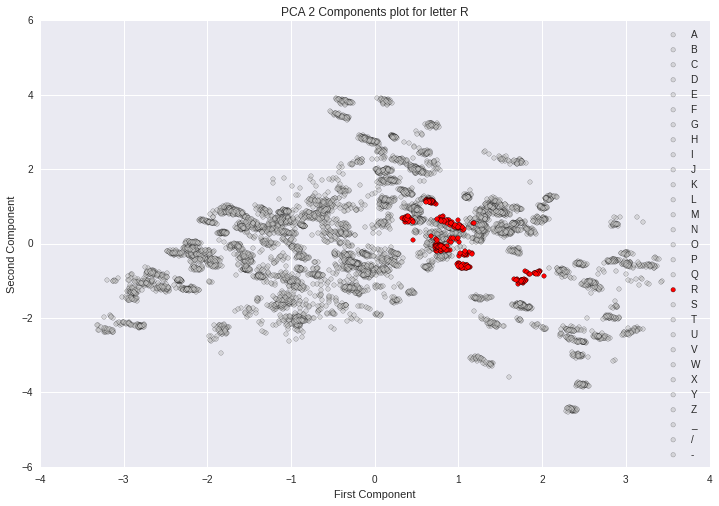

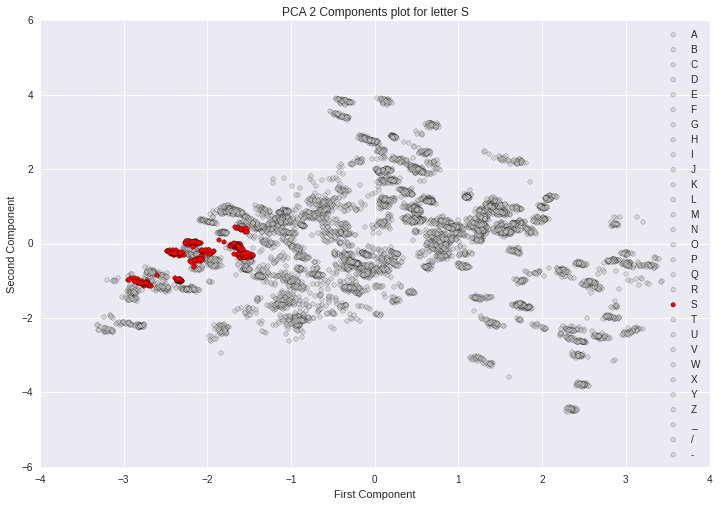

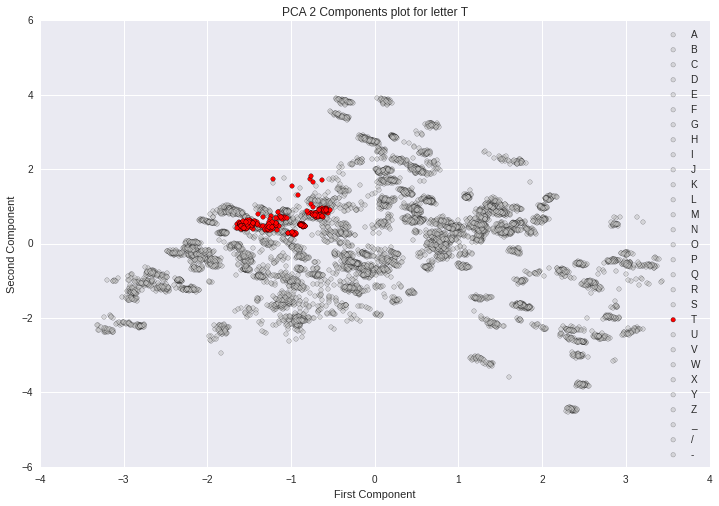

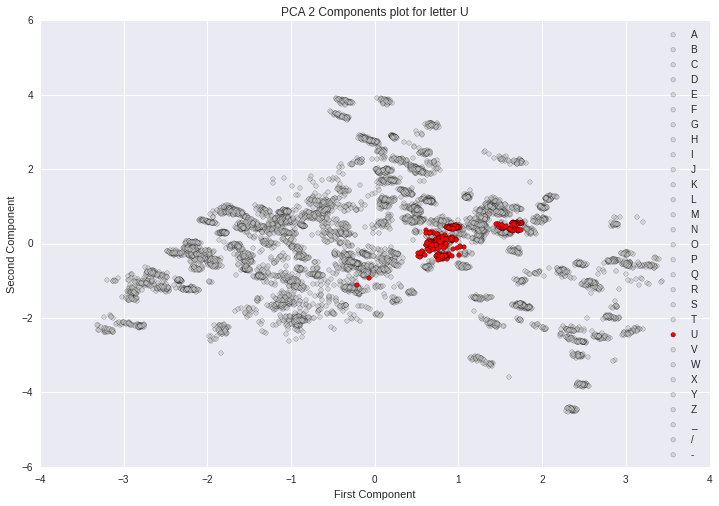

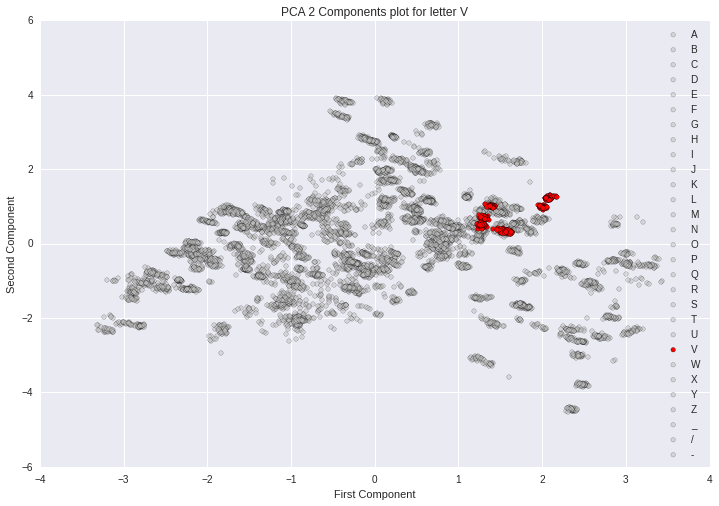

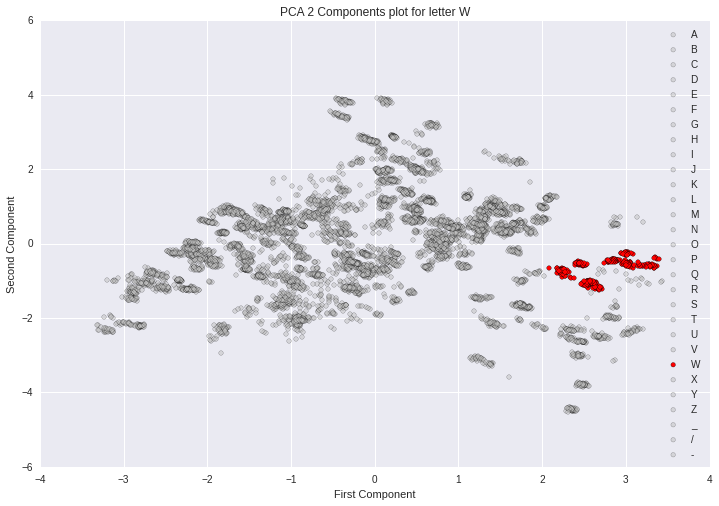

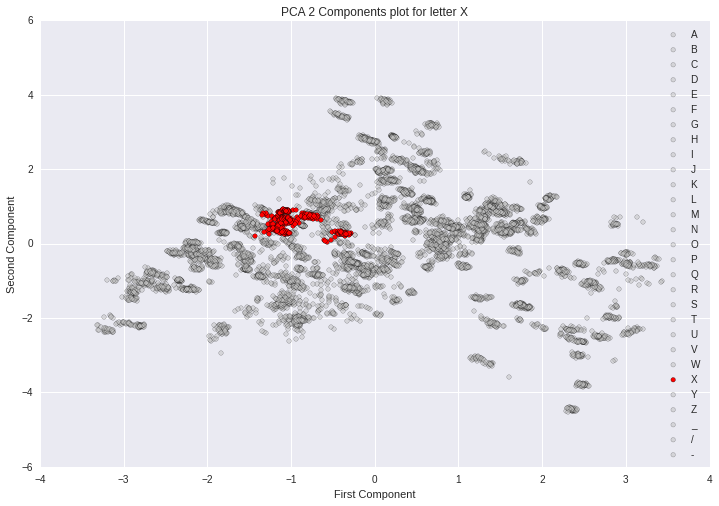

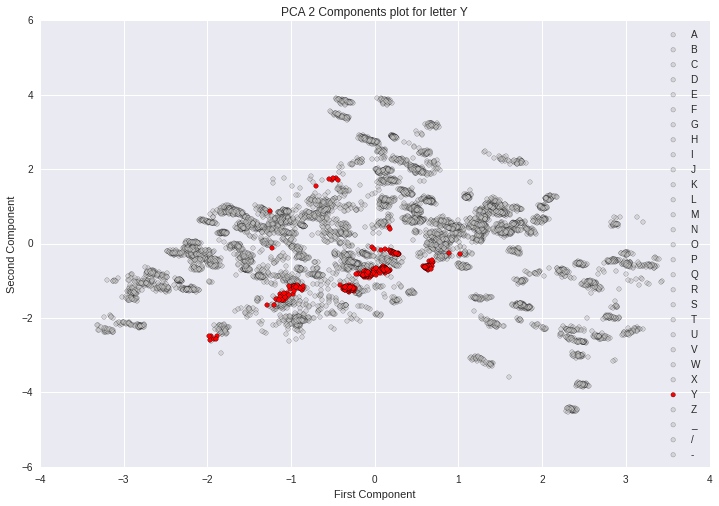

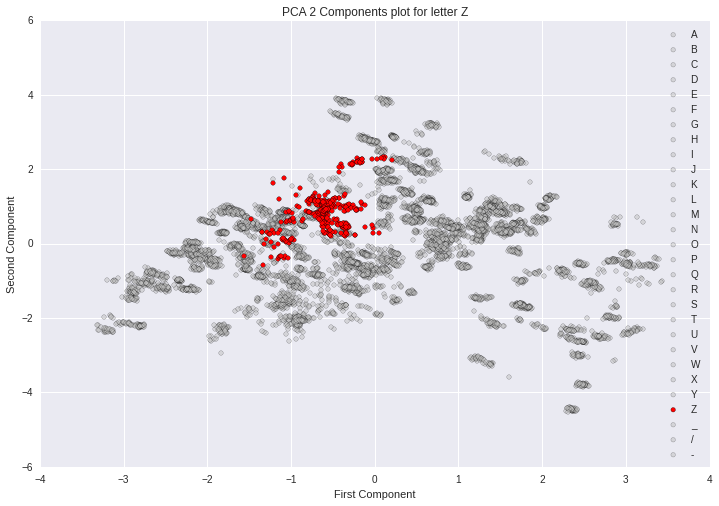

In [79]:
print("***** Plotting PCA *****")
n = 12
directory = "wo_g"
pca = PCA(n_components=n)
X_pca = pca.fit(X_std).transform(X_std)
for i in range(26):
    plot_scatter(X_pca, i, "PCA of the dataset", directory)

print('Explained variance ratio (first %s components): %s' % (str(n), str(pca.explained_variance_ratio_)))


### Linear Discriminant Analysis (LDA) 
Identifies attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

### SVM (Support Vector Machine)
    * supervised learning method that try to obtain hyperplanes that separate classes
    * Effective when working with high-dimensional data aka lot of features
    * Efficient in space
    * Calculation intensive
    * Doesn't return numerical indicator on how confident it is in predicting
    
### SVC (Support Vector Classifier) for classification

Adjustment of parameters
    Kernel functions: different similarity measures between instances.
    By default, the SVC class uses the rbf kernel, which allows us to model nonlinear
    problems. To start, we will use the simplest kernel, the linear one.
    C and gamma can also be checked

In [6]:
# Assignment of test and training data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

In [13]:
names = [
    "Nearest Neighbors", 
#     "Linear SVM",
    "RBF SVM", 
    "Decision Tree",
    "Random Forest",
    "AdaBoost", 
    "Naive Bayes"
     ]
classifiers = [
    KNeighborsClassifier(),
#     SVC(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
    ]

parameters = [
    {'n_neighbors': [3, 5, 8, 12]},
#     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 2], 'C': [1, 10, 100, 1000]},
    {'max_depth': [3, 5, 8, 12, 20]},
    {'max_depth': [3, 5, 8, 12], 'n_estimators': [5, 10, 15], 'max_features': [1, 3, 5]},
    {'n_estimators': [30, 50, 100]},
    {},
]


In [14]:
print("***** Modeling start *****")

clf_predictor = []
for name, clf, parameter in zip(names, classifiers, parameters):
    print("\n################ %s ################" % name)
    grid_search = GridSearchCV(clf, parameter, cv = 5)
    grid_search.fit(X_train, y_train)

    print("Best parameters set found on development set: \n %s" % str(grid_search.best_params_))
    print("Grid scores on development set: \n")
    for params, mean_score, scores in grid_search.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    
    print("The model is trained on the full development set. \n The scores are computed on the full evaluation set. \n")
    y_true, y_pred = y_test, grid_search.predict(X_test)
    print(metrics.classification_report(y_true, y_pred))

    clf_predictor.append(grid_search)

***** Modeling start *****

################ Nearest Neighbors ################
Best parameters set found on development set: 
 {'n_neighbors': 3}
Grid scores on development set: 

0.989 (+/-0.005) for {'n_neighbors': 3}
0.983 (+/-0.008) for {'n_neighbors': 5}
0.978 (+/-0.008) for {'n_neighbors': 8}
0.970 (+/-0.006) for {'n_neighbors': 12}
The model is trained on the full development set. 
 The scores are computed on the full evaluation set. 

             precision    recall  f1-score   support

          0       0.99      0.99      0.99        97
          1       0.99      1.00      0.99        77
          2       0.99      0.97      0.98        80
          3       1.00      1.00      1.00        94
          4       1.00      1.00      1.00        85
          5       1.00      0.99      0.99        95
          6       1.00      1.00      1.00        84
          7       1.00      1.00      1.00        92
          8       0.94      0.96      0.95        82
          9       0.9

/home/jerelynco/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
#Should be in the predictor folder
for clf in clf_predictor:
    path = "prediction/predictor/wo_g/%s.pkl" % str(clf.estimator).split("(")[0]
    joblib.dump(clf, path)


In [46]:
KNeighborsClassifier = joblib.load("prediction/predictor/all/KNeighborsClassifier.pkl")
KNeighborsClassifier.predict(np.array(X_test[0]).reshape(1,-1))
    
# KNeighborsClassifier

array([18])

In [9]:
# colors = ['black', 'blue', 'purple', 'cyan', 'yellow', 'azure', 'red', 'lime', 'orange', 'lavander', 'aquamarine',\
#           'lightgreen', 'violet', 'turquoise', 'navy', 'maroon', 'deepskyblue', 'pink', 'fuchsia', \
#           'chocolate', 'limegreen', 'olive', 'beige', 'ivory', 'thistle', 'midnightblue', 'deeppink']

In [ ]:
def evaluate_cross_validation(clf, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y_train), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    
def fit_clf(clf):
    clf.fit(X_train, y_train)
    return clf

def train_and_evaluate(clf):
    clf.fit(X_train, y_train)
    print("Accuracy on training set:")
    print(clf.score(X_train, y_train))
    print("Accuracy on testing set:")
    print(clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    return clf
